# ¡Hola Oscar! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

---

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Oscar excelente trabajo en este proyecto. Has demostrado un dominio muy sólido del proceso completo de modelado: desde la limpieza de datos, transformación, partición y reescalamiento, hasta la construcción, ajuste, evaluación y comparación de múltiples modelos de machine learning avanzados. Tus códigos son organizados y reflejan un buen criterio técnico, además de una evolución clara en la aplicación de mejores prácticas como la validación temprana y la optimización de hiperparámetros.
    
    
¡Sigue trabajando con esa dedicación y pasión, vas camino a ser un excelente científico de datos! 🚀
    
Te deseo éxitos en tu próximo Sprint 🚀
    
*Estado del Proyecto:* **Aprobado**

</div>

-----

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.

A Rusty Bargain le interesa:

- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [1]:
# Importación de librerías

import pandas as pd
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
import time

In [2]:
#Importación de DF

df = pd.read_csv('/datasets/car_data.csv') #, index_col = 'DateCrawled')

### Diagnóstico inicial

* Forma del dataframe
* Cambio de tipo de dato de RegistrationYear a object
* Información del dataframe original
* Revisión de filas duplicadas en dataframes
* Renombramiento de columnas snake_case
* Determinación de atributos numéricos y NO numéricos

In [3]:
# Forma del dataframe

print("Filas y columnas en df: ",df.shape)

Filas y columnas en df:  (354369, 16)


In [4]:
# Cambio de tipo de dato de RegistrationYear a object

df["RegistrationYear"] = df["RegistrationYear"].astype(object)

In [5]:
# Información del dataframe original

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  object
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(6), object(

In [6]:
# Revisión de filas duplicadas en dataframes

print("Filas duplicadas en df: ",df.duplicated().sum())

Filas duplicadas en df:  262


In [7]:
# Renombramiento de columnas snake_case

df = df.rename(columns={'DateCrawled': 'date_crawled', 'Price': 'price', 'VehicleType': 'vehicle_type', 'RegistrationYear': 'registration_year', 'Gearbox': 'gearbox', 'Power': 'power', 'Model': 'model', 'Mileage': 'mileage', 'RegistrationMonth': 'registration_month', 'FuelType': 'fueltype', 'Brand': 'brand', 'NotRepaired': 'not_repaired', 'DateCreated': 'date_created', 'NumberOfPictures': 'number_of_pictures', 'PostalCode': 'postal_code', 'LastSeen': 'last_seen'})

In [8]:
df.head(5)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fueltype,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  object
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   mileage             354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fueltype            321474 non-null  object
 10  brand               354369 non-null  object
 11  not_repaired        283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

In [10]:
# Atributos NO numéricos
non_num_features = ['date_crawled', 'vehicle_type', 'registration_year', 'gearbox', 'model', 'registration_month', 'fueltype', 'brand', 'not_repaired', 'date_created', 'number_of_pictures', 'postal_code', 'last_seen']

# Atributos numéricos
num_features = ['power', 'mileage']

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info`, `describe` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. Con esta información, podemos establecer una hoja de ruta para ajustar, modificar y analizar los datos de una manera adecuada. Adicionalmente, hiciste unos primeros ajustes al dataset, esto te permitirá hacer un análisis más efectivo

</div>

### Análisis exploratorio de los datos

* Determinación de características y objetivos
Análisis de target
* Resumen estadístico de target
* Visualización de la distribución
Análisis de features
* Correlación de atributos numéricos
* Resumen estadístico de atributos numéricos
* Graficos de atributos numéricos
* Determinación de outliers "power" y "mileage"
* Análisis de variación de atributos NO numéricos

 

"Los modelos de regresión, para que sean confiables y robustos requieren del cumplimiento e 3 premisas fundamentales
 * La distribución de la variable objetivo debe ser aproximadamente normal
 * Los atributos deben ser independientes (no deben estar correlacionadas)
 * Los errores de predicción deben tener una distribución de media 0 (ruidos blancos)"

In [11]:
# Determinación de características y objetivos
features = df.drop('price', axis=1) # extrae las características
target = df['price'] # extrae los objetivos

#### Análisis de target

In [12]:
# Resumen estadístico de target

target.describe().round(0)

count    354369.0
mean       4417.0
std        4514.0
min           0.0
25%        1050.0
50%        2700.0
75%        6400.0
max       20000.0
Name: price, dtype: float64

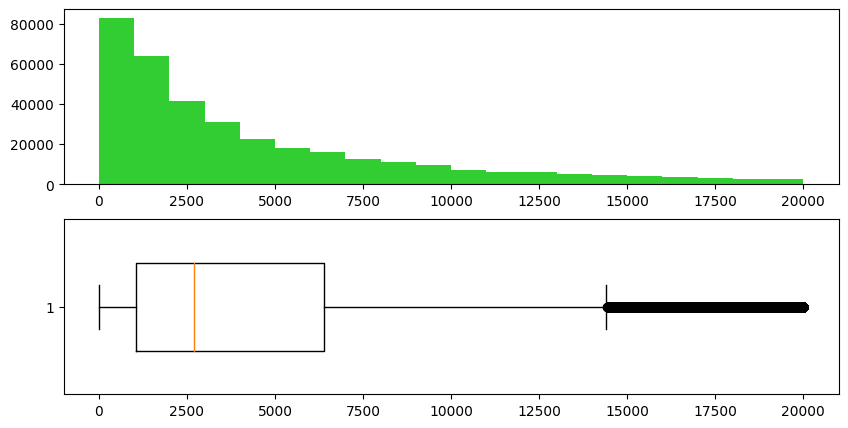

In [13]:
# Visualización de la distribución

fig, ax = plt.subplots(2,1, figsize = [10,5])
ax[0].hist(target, bins = 20, color = 'limegreen')
ax[1].boxplot(target, vert = False, widths = 0.5)

plt.show()

#### Análisis de features

##### Análisis de atributos numéricos

In [14]:
num_features

['power', 'mileage']

In [15]:
# Correlación de atributos numéricos
correlation = features[num_features].corr().abs()
correlation.style.background_gradient(cmap = plt.get_cmap('Reds'), axis = None)

,power,mileage
power,1.000000,0.024002
mileage,0.024002,1.000000


In [16]:
# Resumen estadístico de atributos numéricos

df[num_features].describe()

,power,mileage
count,354369.000000,354369.000000
mean,110.094337,128211.172535
std,189.850405,37905.341530
min,0.000000,5000.000000
25%,69.000000,125000.000000
50%,105.000000,150000.000000
75%,143.000000,150000.000000
max,20000.000000,150000.000000


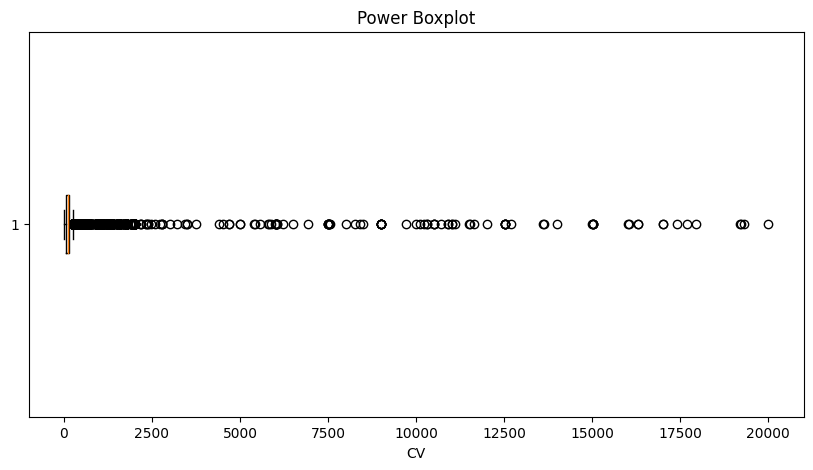

In [17]:
# Gráfico de caja y bigotes "power"

plt.figure(figsize=(10, 5))
plt.boxplot(df['power'], vert = False)
plt.title("Power Boxplot")
plt.xlabel("CV")
plt.show()

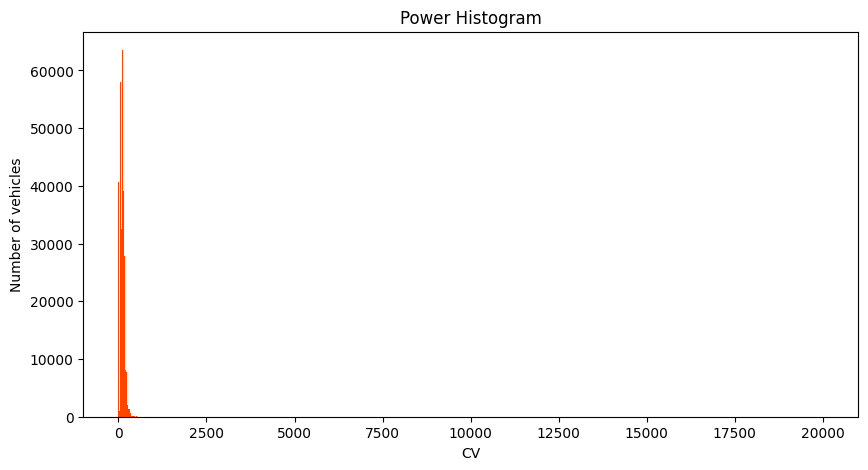

In [18]:
# Histograma "power"

plt.figure(figsize=(10, 5))
plt.hist(df['power'], bins=1000, color='orangered')
plt.title("Power Histogram")
plt.xlabel("CV")
plt.ylabel("Number of vehicles")
plt.show()

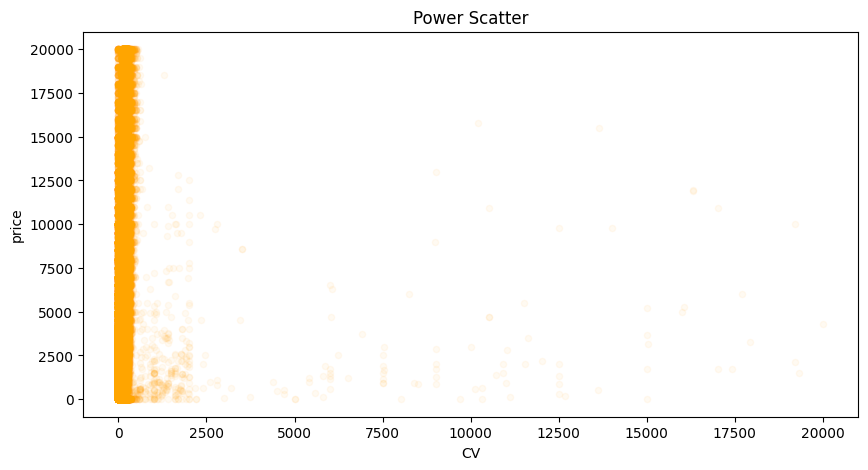

In [19]:
# Gráfico de dispersión "power"

df.plot(x='power',y='price',kind='scatter', alpha=.05, color="orange", figsize=(10, 5))
plt.title("Power Scatter")
plt.xlabel("CV")
plt.show()

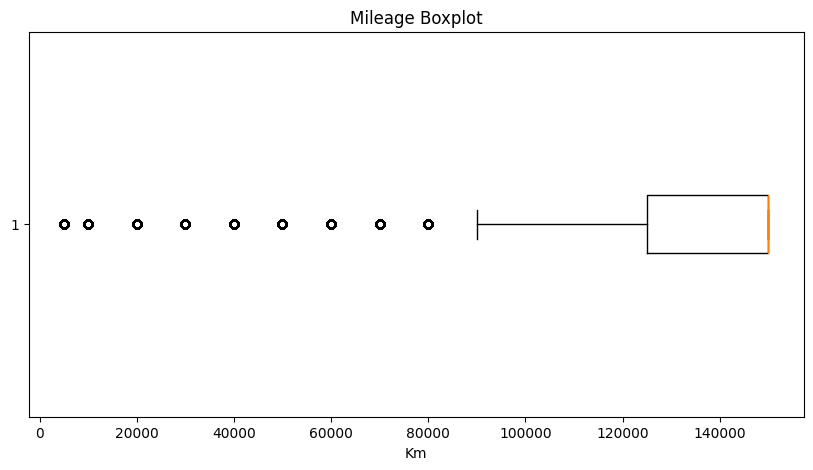

In [20]:
# Gráfico de caja y bigotes "mileage"

plt.figure(figsize=(10, 5))
plt.boxplot(df['mileage'], vert = False)
plt.title("Mileage Boxplot")
plt.xlabel("Km")
plt.show()

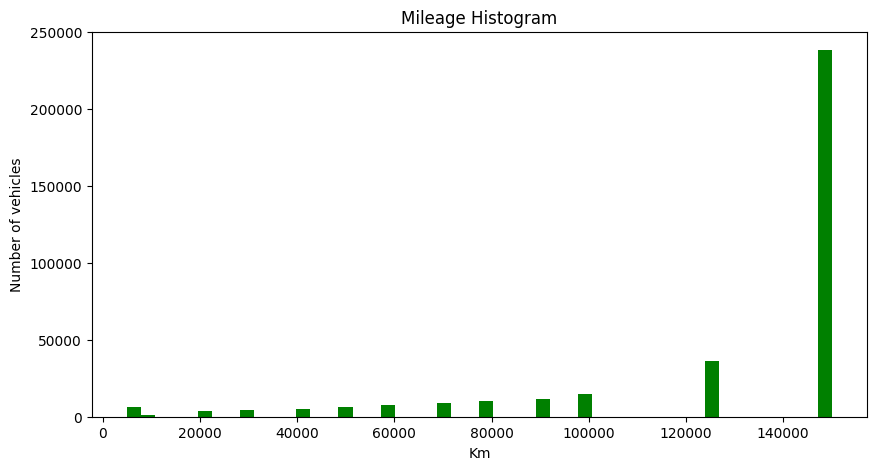

In [21]:
# Histograma "mileage"

plt.figure(figsize=(10, 5))
plt.hist(df['mileage'], bins=50, color='green')
plt.title("Mileage Histogram")
plt.xlabel("Km")
plt.ylabel("Number of vehicles")
plt.show()

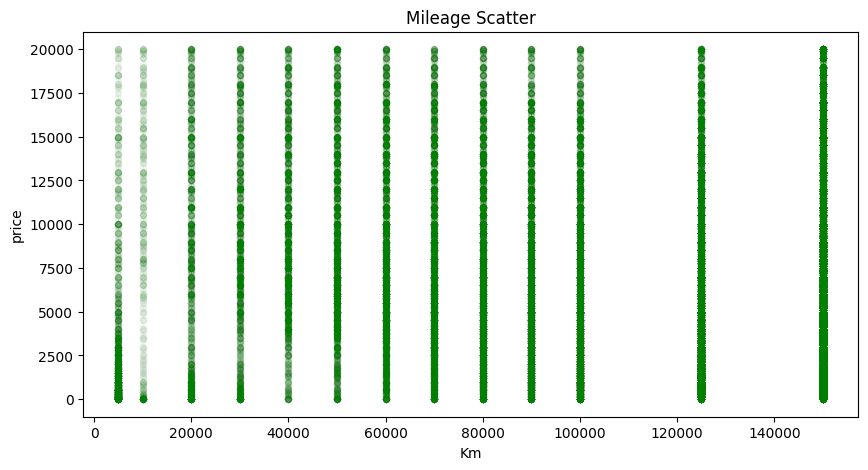

In [22]:
# Gráfico de dispersión "mileage"

df.plot(x='mileage',y='price',kind='scatter', alpha=.01, color="green", figsize=(10, 5))
plt.title("Mileage Scatter")
plt.xlabel("Km")
plt.show()

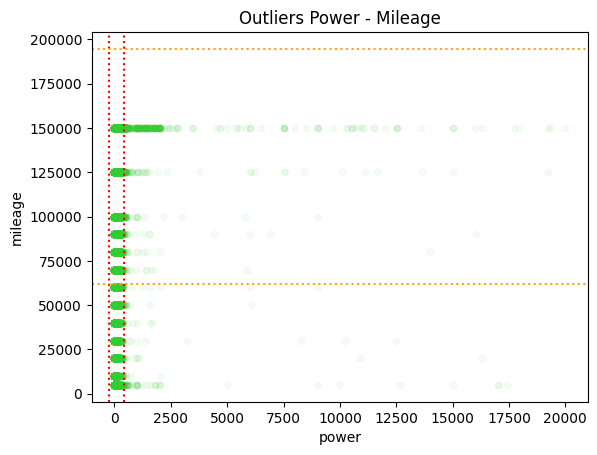

In [23]:
# Determinación de outliers "power" y "mileage"
# Media y desviación

means = df[num_features].mean()
stds = df[num_features].std()

# Definición de límites

low_lim_h = means["power"] - 1.75 * stds["power"]
upp_lim_h = means["power"] + 1.75 * stds["power"]

low_lim_v = means["mileage"] - 1.75 * stds["mileage"]
upp_lim_v = means["mileage"] + 1.75 * stds["mileage"]

# Visualizar datos

df[num_features].plot(
    x = "power",
    y = "mileage",
    kind = "scatter",
    alpha = .05,
    color = "limegreen")

plt.axvline(x = low_lim_h, color = 'red', linestyle = 'dotted')
plt.axvline(x = upp_lim_h, color = 'red', linestyle = 'dotted')

plt.axhline(y = low_lim_v, color = 'orange', linestyle = 'dotted')
plt.axhline(y = upp_lim_v, color = 'orange', linestyle = 'dotted')

plt.title("Outliers Power - Mileage")
plt.show()

In [24]:
# Función de determinación de outliers

def outliers (x):
    if (low_lim_h < x['power'] < upp_lim_h) and (low_lim_v < x['mileage'] < upp_lim_v):
        return 0
    else:
        return 1

In [25]:
# Aplicación de función outliers

df['outlier'] = df.apply(outliers, axis=1)
n_out = df['outlier'].sum()
print(f"Cantidad de outliers: {n_out}")

Cantidad de outliers: 35172


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Las gráficas que has obtenido son correctas y bastante interesantes, pero es crucial acompañarla con tu análisis y observaciones. Esto añade valor significativo a la información presentada y evita que solo sean datos sin contexto. Desarrollar esta capacidad de interpretación es esencial cuanto estamos trabajando con datos. 

</div>

##### Análisis de atributos no numéricos

In [26]:
non_num_features

['date_crawled',
 'vehicle_type',
 'registration_year',
 'gearbox',
 'model',
 'registration_month',
 'fueltype',
 'brand',
 'not_repaired',
 'date_created',
 'number_of_pictures',
 'postal_code',
 'last_seen']

Variabilidad de atributos no numéricos (9-1)

Definición de puntos de acción:
* Si el ratio de frecuencia mínimo es mayor a 9 y el ratio de unicidad es menor a 10%, entonces el atributo debería eliminarse porque no presenta variabilidad y por tanto no aporta en la construcción de un modelo predictivo.
* Caso contrario, si el ratio de frecuencia máximo es mayor a 9, entonces generar unproceso de agrupamiento del atributo, pues existen clases poco representativas, aunque sin un alta concentración.
* Caso contrario, el atributo no tiene suficiente variabilidad y debería mantenerse entre los datos.

In [27]:
# Análisis de variación de atributos NO numéricos

def var_analisys (serie):
    
    #Ordear la serie de mayor a menor
    serie = serie.sort_values(ascending=False)
    
    #Definir los ratios relevantes
    ratio_freq_min = serie.iloc[0]/serie.iloc[1]
    ratio_freq_max = serie.iloc[0]/serie.iloc[-1]
    ratio_unique = len(serie)/serie.sum()
    
    #Mensajes de resultados alcanzados
    print(f"Atributo {serie.name}")
    print(f"El caso de mayor frecuencia en atributo es entre {ratio_freq_min:.1f} y {ratio_freq_max:.1f} veces el resto")
    print(f"Los casos únicos en atributo representan {ratio_unique*100:.1f}% del total de los casos")
    
    #Sugerencia sobre el atributo
    if ratio_freq_min > 90/10 and ratio_unique < 0.1:
        print("ELIMINAR ATRIBUTO")
    elif ratio_freq_max > 90/10:
        print("AGRUPAR ATRIBUTO")
    else:
        print("MANTENER ATRIBUTO")
    
    #return (ratio_freq_min, ratio_freq_max, ratio_unique)

In [28]:
# Conteo de valores en atributos NO numéricos
date_crawled_cases = df['date_crawled'].value_counts()
vehicle_type_cases = df['vehicle_type'].value_counts()
registration_year_cases = df['registration_year'].value_counts()
gearbox_cases = df['gearbox'].value_counts()
model_cases = df['model'].value_counts()
registration_month_cases = df['registration_month'].value_counts()
fueltype_cases = df['fueltype'].value_counts()
brand_cases = df['brand'].value_counts()
not_repaired_cases = df['not_repaired'].value_counts()
date_created_cases = df['date_created'].value_counts()
number_of_pictures_cases = df['number_of_pictures'].value_counts()
postal_code_cases = df['postal_code'].value_counts()
last_seen_cases = df['last_seen'].value_counts()

In [29]:
# Resumen de atributos NO numéricos

ratios_date_crawled_cases = var_analisys(date_crawled_cases)
#print(df['date_crawled'].sort_values().unique())
print()
ratios_vehicle_type_cases = var_analisys(vehicle_type_cases)

print()
ratios_registration_year_cases = var_analisys(registration_year_cases)

print()
ratios_gearbox_cases = var_analisys(gearbox_cases)

print()
ratios_model_cases = var_analisys(model_cases)

print()
ratios_registration_month_cases = var_analisys(registration_month_cases)

print()
ratios_fueltype_cases = var_analisys(fueltype_cases)

print()
ratios_brand_cases = var_analisys(brand_cases)

print()
ratios_not_repaired_cases = var_analisys(not_repaired_cases)

print()
ratios_date_created_cases = var_analisys(date_created_cases)

print()

ratios_postal_code_cases = var_analisys(postal_code_cases)

print()
ratios_last_seen_cases = var_analisys(last_seen_cases)


Atributo date_crawled
El caso de mayor frecuencia en atributo es entre 1.1 y 66.0 veces el resto
Los casos únicos en atributo representan 4.4% del total de los casos
AGRUPAR ATRIBUTO

Atributo vehicle_type
El caso de mayor frecuencia en atributo es entre 1.1 y 27.8 veces el resto
Los casos únicos en atributo representan 0.0% del total de los casos
AGRUPAR ATRIBUTO

Atributo registration_year
El caso de mayor frecuencia en atributo es entre 1.1 y 24490.0 veces el resto
Los casos únicos en atributo representan 0.0% del total de los casos
AGRUPAR ATRIBUTO

Atributo gearbox
El caso de mayor frecuencia en atributo es entre 4.0 y 4.0 veces el resto
Los casos únicos en atributo representan 0.0% del total de los casos
MANTENER ATRIBUTO

Atributo model
El caso de mayor frecuencia en atributo es entre 1.2 y 14616.0 veces el resto
Los casos únicos en atributo representan 0.1% del total de los casos
AGRUPAR ATRIBUTO

Atributo registration_month
El caso de mayor frecuencia en atributo es entre 1.1 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo organizando el análisis de variabilidad de los atributos no numéricos! La función var_analisys está bien estructurada y logra cumplir con los criterios planteados, además los mensajes son claros.
    
<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Podrías hacer el código más eficiente usando un bucle en lugar de repetir el análisis para cada atributo.
    

</div>    

</div>

### Ingeniería de atributos


* Eliminación de filas duplicadas en dataframe
* Eliminación de outliers de atributos numéricos
 
* Eliminación de filas con valores menores a 800 EUR en atributo price. El precio mínimo en las transacciones de este tipo considera un promedio de 800 USD en la práctica, por lo que conservar filas inferiores afectará las predicciones correspondientes.

* Atributo power: Se establece 80 como valor mínimo en caballos de vapor

* Atributo vehicle_type: Rellenar NaN con "other" (valores NaN equivalentes al 9% del total del atributo, mas 1% de clase "other" ya existente)
* Atributo model: Rellenar NaN con "other" (valores NaN equivalentes al 5% del total del atributo, mas 6% de clase "other" ya existente)
* Atributo fueltype: Rellenar NaN con "other" (valores NaN equivalentes al 8% del total del atributo, mas 0% de clase "other" ya existente)

* Atributo gearbox: Rellenar NaN con "unknown" (valores NaN equivalentes al 5% del total del atributo)
* Atributo not_repaired: Rellenar NaN con "unknown" (valores NaN equivalentes al 18% del total del atributo)

* Eliminación de atributo 'number_of_pictures': Todos los datos son "0"
* Eliminación de atributo 'date_crawled', 'date_created','last_seen': datos de fecha irrelevantes para la predicción
* Eliminación de atributo 'registration_month', postal_code: datos
* Eliminación de colmna "outlier" (sirvió para determinar outliers)

* Atributo registration_year: Permanece sin cambios
* Atributo brand: Permanece sin cambios

* Reescalamiento de target con un logaritmo

In [30]:
# Revisión de filas duplicadas en dataframes

print("Filas duplicadas en df: ",df.duplicated().sum())

Filas duplicadas en df:  262


In [31]:
# Eliminación de filas duplicadas en dataframe

df_trimmed = df.drop_duplicates(keep='first')
df_trimmed

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fueltype,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,outlier
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16,0
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46,0
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47,0
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40,0
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42,0
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46,1
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17,0
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15,0


In [32]:
# Extracción de índices de datos no outliers

index_in = df_trimmed.loc[df_trimmed['outlier'] == 0,].index

# Excepción de outliers

df_trimmed = df.iloc[index_in]
df_trimmed

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fueltype,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,outlier
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16,0
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46,0
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47,0
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40,0
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354363,27/03/2016 20:36,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,no,27/03/2016 00:00,0,26624,29/03/2016 10:17,0
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42,0
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17,0
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15,0


In [33]:
# Extracción de precios menores de 800 USD

price_in = df_trimmed.loc[df_trimmed['price'] > 799,].index


# Excepción de precios menores de 800 USD

df_trimmed = df.iloc[price_in]
df_trimmed

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fueltype,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,outlier
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46,0
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47,0
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40,0
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17,0
6,01/04/2016 20:48,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354362,19/03/2016 19:53,3200,sedan,2004,manual,225,leon,150000,5,petrol,seat,yes,19/03/2016 00:00,0,96465,19/03/2016 20:44,0
354363,27/03/2016 20:36,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,no,27/03/2016 00:00,0,26624,29/03/2016 10:17,0
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17,0
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15,0


In [34]:
# Resumen de filas eliminadas

deleted_rows = df.shape[0] - df_trimmed.shape[0]
print(f"Filas eliminadas:{deleted_rows}")
percent_deleted_rows = deleted_rows / df.shape[0]
print(f"% de filas eliminadas:{percent_deleted_rows}")

Filas eliminadas:93972
% de filas eliminadas:0.2651812094173023


In [35]:
# Nuevo límite inferior para "power"

df_trimmed["power"] = df_trimmed["power"].where(df_trimmed["power"] > 80, 80)

/tmp/ipykernel_225/2691863771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed["power"] = df_trimmed["power"].where(df_trimmed["power"] > 80, 80)


In [36]:
# Valores Nan a "other"

df_trimmed[['vehicle_type', 'model', 'fueltype']] = df_trimmed[['vehicle_type', 'model', 'fueltype']].fillna("other")
df_trimmed

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fueltype,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,outlier
1,24/03/2016 10:58,18300,coupe,2011,manual,190,other,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46,0
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47,0
3,17/03/2016 16:54,1500,small,2001,manual,80,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40,0
4,31/03/2016 17:25,3600,small,2008,manual,80,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17,0
6,01/04/2016 20:48,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354362,19/03/2016 19:53,3200,sedan,2004,manual,225,leon,150000,5,petrol,seat,yes,19/03/2016 00:00,0,96465,19/03/2016 20:44,0
354363,27/03/2016 20:36,1150,bus,2000,manual,80,zafira,150000,3,petrol,opel,no,27/03/2016 00:00,0,26624,29/03/2016 10:17,0
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17,0
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15,0


In [37]:
# Valores Nan a "unknown"

df_trimmed[['gearbox', 'not_repaired']] = df_trimmed[['gearbox', 'not_repaired']].fillna("unknown")
df_trimmed

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fueltype,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,outlier
1,24/03/2016 10:58,18300,coupe,2011,manual,190,other,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46,0
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,14/03/2016 00:00,0,90480,05/04/2016 12:47,0
3,17/03/2016 16:54,1500,small,2001,manual,80,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40,0
4,31/03/2016 17:25,3600,small,2008,manual,80,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17,0
6,01/04/2016 20:48,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354362,19/03/2016 19:53,3200,sedan,2004,manual,225,leon,150000,5,petrol,seat,yes,19/03/2016 00:00,0,96465,19/03/2016 20:44,0
354363,27/03/2016 20:36,1150,bus,2000,manual,80,zafira,150000,3,petrol,opel,no,27/03/2016 00:00,0,26624,29/03/2016 10:17,0
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17,0
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15,0


In [38]:
# Eliminación de columnas irrelevantes

df_trimmed = df_trimmed.drop(['number_of_pictures', 'date_crawled', 'date_created', 'last_seen', 'registration_month', 'postal_code', 'outlier'], axis=1)

In [39]:
# Información de Dataframe recortado
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260397 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              260397 non-null  int64 
 1   vehicle_type       260397 non-null  object
 2   registration_year  260397 non-null  object
 3   gearbox            260397 non-null  object
 4   power              260397 non-null  int64 
 5   model              260397 non-null  object
 6   mileage            260397 non-null  int64 
 7   fueltype           260397 non-null  object
 8   brand              260397 non-null  object
 9   not_repaired       260397 non-null  object
dtypes: int64(3), object(7)
memory usage: 21.9+ MB


In [40]:
# Atributos NO numéricos para nuevo dataframe
non_num_features_tr = ['vehicle_type', 'registration_year', 'gearbox', 'model', 'fueltype', 'brand', 'not_repaired']

# Atributos numéricos para nuevo dataframe
num_features_tr = ['power', 'mileage']

In [41]:
# Determinación de características y objetivos para nuevo dataframe
features_tr = df_trimmed.drop('price', axis=1) # extrae las características
target_tr = df_trimmed['price'] # extrae los objetivos

In [42]:
# Reescalamiento de target con un logaritmo

target_tr_dec = np.log10(target_tr + 1)

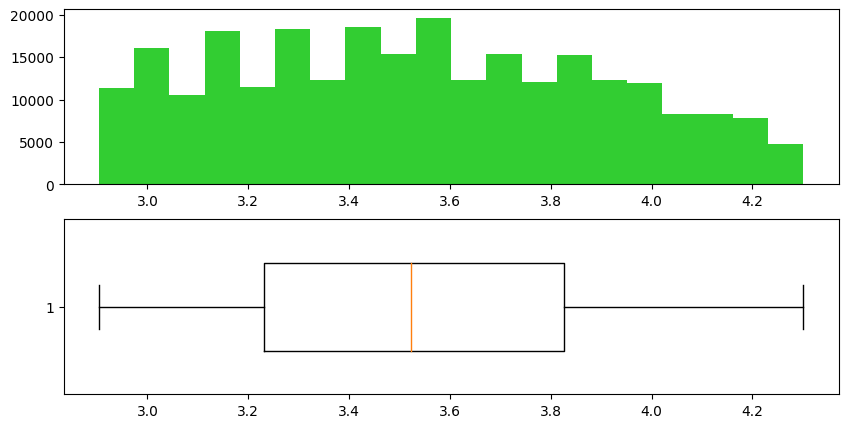

In [43]:
# Visualizar la distribución


fig, ax = plt.subplots(2,1, figsize = [10,5])
ax[0].hist(target_tr_dec, bins = 20, color = 'limegreen')
ax[1].boxplot(target_tr_dec, vert = False, widths = 0.5)

plt.show()

In [44]:
# Codificación de atributos no numéricos (one-hot)

features_tr = pd.get_dummies(features_tr, drop_first = True, dtype = int)
features_tr

,power,mileage,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,vehicle_type_wagon,registration_year_1928,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,not_repaired_unknown,not_repaired_yes
1,190,125000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,163,125000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,80,150000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,80,90000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,109,150000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354362,225,150000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
354363,80,150000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354366,101,125000,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
354367,102,150000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy bien trabajado! Lograste limpiar y transformar de manera ordenada tu conjunto de datos para preparar el modelo, eliminando duplicados, filtrando precios bajos y outliers, manejando valores nulos y realizando codificación one-hot. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Los avisos de `SettingWithCopyWarning` pueden evitarse usando `.loc` para modificar el DataFrame de manera más segura

</div>
</div>

## Entrenamiento del modelo 

In [45]:
# Partición de datos

X_train, X_test, y_train, y_test = train_test_split(features_tr, target_tr, test_size = 0.25, random_state = 12345)

print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)



X_train (195297, 392)
X_test (65100, 392)
y_train (195297,)
y_test (65100,)


In [46]:
# Reescalamiento de target con un logaritmo

y_train_dec = np.log10(y_train + 1)


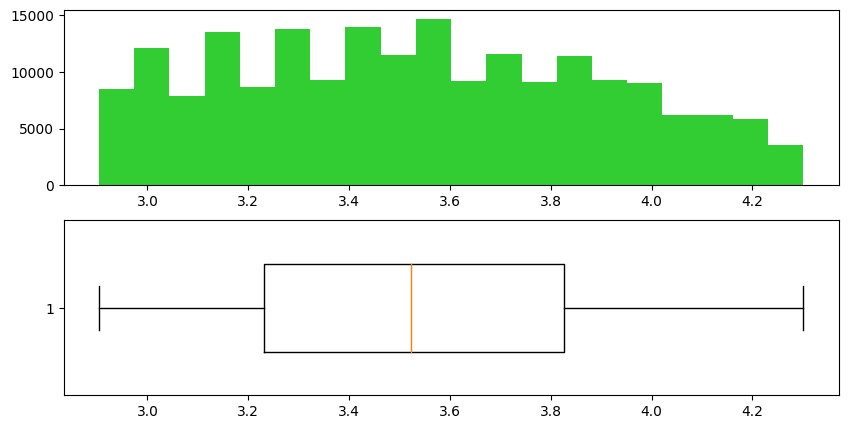

In [47]:
# Visualizar la distribución

fig, ax = plt.subplots(2,1, figsize = [10,5])
ax[0].hist(y_train_dec, bins = 20, color = 'limegreen')
ax[1].boxplot(y_train_dec, vert = False, widths = 0.5)

plt.show()

In [48]:
pd.options.display.float_format = '{:.4f}'.format


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Oscar has realizado correctamente la partición de los datos para el entrenamiento y prueba del modelo, manteniendo una proporción adecuada y utilizando una semilla para asegurar reproducibilidad. Además, la visualización de la distribución del objetivo (y_train) transformado es una práctica muy útil para entender mejor los datos antes de modelar. 


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

No era necesario volver a aplicar el logaritmo a y_train, porque target_tr ya estaba previamente reescalado con `np.log10`; podrías ahorrarte ese paso y evitar posibles confusiones

</div>
</div>

### Modelo de Regresión Lineal

In [49]:
lr_start_time = time.time()

# Creación y ajuste del modelo
lr_mod = LinearRegression()
lr_mod.fit(X_train, y_train_dec)
lr_pred_dec = lr_mod.predict(X_test)

lr_pred = 10**lr_pred_dec - 1 # Reversión de efecto logarítmico

lr_rmse = mean_squared_error(y_test, lr_pred, squared = False)
lr_r2 = r2_score(y_test, lr_pred)

print(f'RMSE en Regresión Lineal: {lr_rmse}')
print(f'R2 en Regresión Lineal: {lr_r2:.2%}')

lr_end_time = time.time()
lr_execution_time = lr_end_time - lr_start_time
print(f"Tiempo de ejecución: {lr_execution_time} segundos")

RMSE en Regresión Lineal: 2136.3043231549773
R2 en Regresión Lineal: 74.01%
Tiempo de ejecución: 9.21694564819336 segundos


In [50]:
# DF valores predichos-verdaderos

lr_pred_s = pd.Series(lr_pred, index=X_test.index)
lr_compar_df = pd.concat([lr_pred_s,y_test],axis=1, join='inner')
lr_compar_df.columns = ['predicted', 'true']
lr_compar_df["diff"] = lr_compar_df["true"] - lr_compar_df["predicted"]
lr_compar_df.sort_values(by='diff', ascending=True)

,predicted,true,diff
168475,54941.9165,19900,-35041.9165
123147,54972.5904,19990,-34982.5904
44700,52064.6758,17900,-34164.6758
211526,37517.2013,7950,-29567.2013
23941,35682.8114,8000,-27682.8114
...,...,...,...
154303,3426.9337,19500,16073.0663
322263,3632.4054,19900,16267.5946
241411,3547.6832,19990,16442.3168
94706,1284.2441,17900,16615.7559


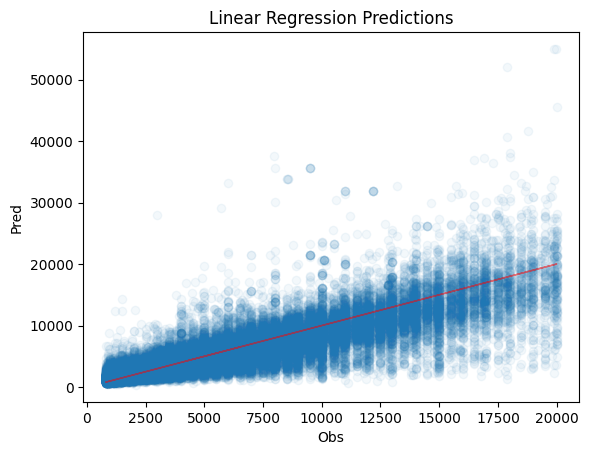

In [51]:
# Visualización de predicciones
plt.scatter(x = y_test, y = lr_pred, alpha=.05)
plt.title("Linear Regression Predictions")
plt.xlabel("Obs")
plt.ylabel("Pred")
plt.plot(y_test , y_test , color = "red", alpha=.5, linewidth=1)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo implementando el modelo de Regresión Lineal! Usaste adecuadamente la transformación inversa del logaritmo, calculaste métricas relevantes como RMSE y R², y además creaste un DataFrame muy útil para comparar valores predichos y verdaderos.

</div>

### Modelo de Árbol de decisión

In [52]:
dtr_start_time = time.time()

# Creación y ajuste del modelo
best_dtr_mod = None
best_dtr_pred = 0
best_dtr_rmse = 10000
best_dtr_r2 = 0
best_dtr_depth = 0

for depth in range(1, 51): # Rango del hiperparámetro de profundidad
    dtr_mod = DecisionTreeRegressor(random_state=12345, max_depth=depth) # Modelo (hiperparámetros)
    dtr_mod.fit(X_train, y_train_dec) # Entrenamiento del modelo en el conjunto de entrenamiento
    dtr_pred_dec = dtr_mod.predict(X_test) # Predicciones del modelo en el conjunto de prueba
    
    dtr_pred = 10**dtr_pred_dec - 1 # Reversión de efecto logarítmico
    
    dtr_rmse = mean_squared_error(y_test, dtr_pred, squared = False)
    dtr_r2 = r2_score(y_test, dtr_pred)
    if dtr_rmse < best_dtr_rmse:
        best_dtr_mod = dtr_mod
        best_dtr_pred = dtr_pred
        best_dtr_rmse = dtr_rmse
        best_dtr_r2 = dtr_r2
        best_dtr_depth = depth
        

print(f"RECM del mejor modelo en Árbol de Decisión (max_depth = {best_dtr_depth}): {best_dtr_rmse}")
print(f"R2 del mejor modelo en Árbol de Decisión: {best_dtr_r2:.2%}")

dtr_end_time = time.time()
dtr_execution_time = dtr_end_time - dtr_start_time
print(f"Tiempo de ejecución: {dtr_execution_time} segundos")

RECM del mejor modelo en Árbol de Decisión (max_depth = 28): 1953.1835936627194
R2 del mejor modelo en Árbol de Decisión: 78.28%
Tiempo de ejecución: 193.60265111923218 segundos


In [53]:
# DF valores predichos-verdaderos

dtr_pred_s = pd.Series(best_dtr_pred, index=X_test.index)
dtr_compar_df = pd.concat([dtr_pred_s,y_test],axis=1, join='inner')
dtr_compar_df.columns = ['predicted', 'true']
dtr_compar_df["diff"] = dtr_compar_df["true"] - dtr_compar_df["predicted"]
dtr_compar_df.sort_values(by='diff', ascending=True)

,predicted,true,diff
173091,19000.0000,2300,-16700.0000
220404,19000.0000,2500,-16500.0000
46391,19800.0000,3800,-16000.0000
132889,17899.0000,2000,-15899.0000
91570,18999.0000,3250,-15749.0000
...,...,...,...
156639,1100.0000,18500,17400.0000
96695,1631.7720,19500,17868.2280
241411,2004.4987,19990,17985.5013
321204,1730.9698,20000,18269.0302


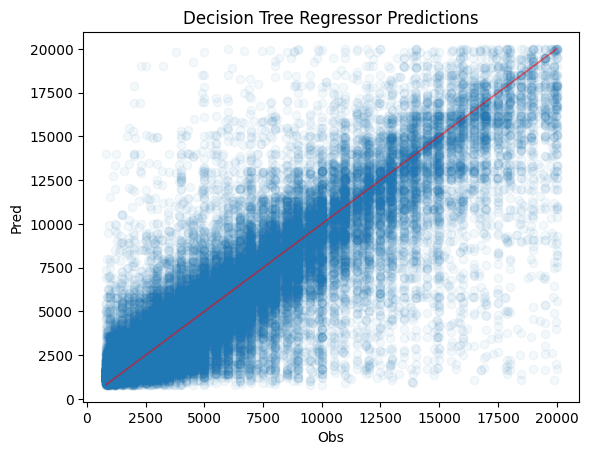

In [54]:
# Visualización de predicciones
plt.scatter(x = y_test, y = best_dtr_pred, alpha=.05)
plt.title("Decision Tree Regressor Predictions")
plt.xlabel("Obs")
plt.ylabel("Pred")
plt.plot(y_test , y_test , color = "red", alpha=.5, linewidth=1)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy bien implementado tu modelo de Árbol de Decisión! Se nota que aplicaste un ajuste de hiperparámetro (max_depth) de forma muy cuidadosa, logrando mejoras significativas en RMSE y R² respecto al modelo lineal. Me gustó mucho que construiste un procedimiento de búsqueda para seleccionar automáticamente el mejor árbol según el RMSE; eso muestra un pensamiento muy práctico y orientado al desempeño.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

 Solo te recomendaría tener en cuenta que hacer 50 iteraciones sobre árboles puede ser costoso en tiempo de cómputo (como viste en los 193 segundos que tardó), y podrías optimizar usando GridSearchCV o reducir ligeramente el rango.

</div>
</div>

### Modelo de Bosque aleatorio

In [55]:
rfr_start_time = time.time()

# Creación y ajuste del modelo
best_rfr_mod = None
best_rfr_pred = 0
best_rfr_rmse = 10000
best_rfr_r2 = 0
best_rfr_depth = 0
best_rfr_est = 0

for est in range(10, 51, 10): # Rango del hiperparámetro de estimadores
    for depth in range(1, 6): # Rango del hiperparámetro de profundidad
        rfr_mod = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)# Modelo (hiperparámetros)
        rfr_mod.fit(X_train, y_train_dec) # Entrenamiento del modelo en el conjunto de entrenamiento
        rfr_pred_dec = rfr_mod.predict(X_test) # Predicciones del modelo en el conjunto de prueba
        
        rfr_pred = 10**rfr_pred_dec - 1 # Reversión de efecto logarítmico
        
        rfr_rmse = mean_squared_error(y_test, rfr_pred, squared = False)
        rfr_r2 = r2_score(y_test, rfr_pred)
        if rfr_rmse < best_rfr_rmse:
            best_rfr_mod = rfr_mod
            best_rfr_pred = rfr_pred
            best_rfr_rmse = rfr_rmse
            best_rfr_r2 = rfr_r2
            best_rfr_depth = depth
            best_rfr_est = est        

print(f"RECM del mejor modelo en Bosque Aleatorio: {best_rfr_rmse} n_estimators: {best_rfr_est} best_depth: {best_rfr_depth}")
print(f"R2 del mejor modelo en Bosque Aleatorio: {best_rfr_r2:.2%}")

rfr_end_time = time.time()
rfr_execution_time = rfr_end_time - rfr_start_time
print(f"Tiempo de ejecución: {rfr_execution_time} segundos")

RECM del mejor modelo en Bosque Aleatorio: 2908.8660610631105 n_estimators: 20 best_depth: 5
R2 del mejor modelo en Bosque Aleatorio: 51.82%
Tiempo de ejecución: 424.0696032047272 segundos


In [56]:
# DF valores predichos-verdaderos

rfr_pred_s = pd.Series(best_rfr_pred, index=X_test.index)
rfr_compar_df = pd.concat([rfr_pred_s,y_test],axis=1, join='inner')
rfr_compar_df.columns = ['predicted', 'true']
rfr_compar_df["diff"] = rfr_compar_df["true"] - rfr_compar_df["predicted"]
rfr_compar_df.sort_values(by='diff', ascending=True)

,predicted,true,diff
128896,12271.1802,1000,-11271.1802
309774,12138.4537,1150,-10988.4537
137330,12271.1802,1500,-10771.1802
184867,12138.4537,1500,-10638.4537
278638,12138.4537,1600,-10538.4537
...,...,...,...
185236,1622.6504,19911,18288.3496
288014,1622.6504,19999,18376.3496
319914,1622.6504,20000,18377.3496
321204,1622.6504,20000,18377.3496


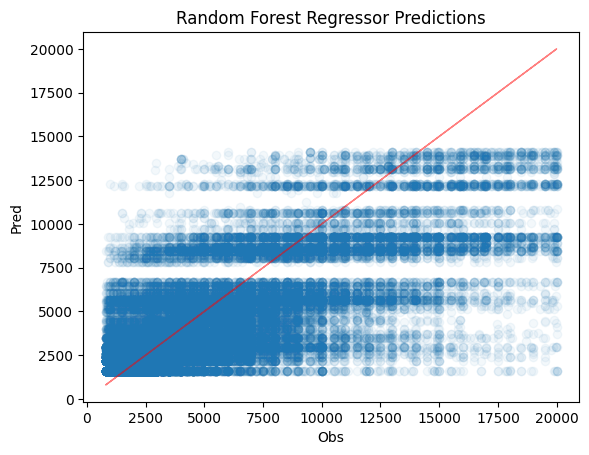

In [57]:
# Visualización de predicciones
plt.scatter(x = y_test, y = best_rfr_pred, alpha=.05)
plt.title("Random Forest Regressor Predictions")
plt.xlabel("Obs")
plt.ylabel("Pred")
plt.plot(y_test , y_test , color = "red", alpha=.5, linewidth=1)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen esfuerzo aplicando el modelo de Bosque Aleatorio! El procedimiento de ajuste de hiperparámetros (n_estimators y max_depth) es correcto y sistemático, lo que muestra que tienes clara la importancia de optimizar el desempeño. Aunque el RMSE fue más alto y el R² más bajo que con el Árbol de Decisión, eso probablemente se deba a que el rango de profundidad que exploraste fue muy pequeño (máximo 5), limitando la complejidad de los árboles en el bosque. ¡No te preocupes, eso es parte del aprendizaje! Solo recuerda que Random Forest suele funcionar mejor con árboles más profundos.

</div>

### Modelo con descenso de gradiente LightGBM

In [58]:
# Inicio del tiempo de ejecución
lgb_start_time = time.time()

# Conjunto de datos para LightGBM
train_lgb = lgb.Dataset(X_train, label=y_train)
test_lgb = lgb.Dataset(X_test, label=y_test, reference=train_lgb)

# Parámetros del modelo
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Entrenamiento del modelo
gbm = lgb.train(params,
                train_lgb,
                num_boost_round=100, # Ajuste del número de rondas
                valid_sets=test_lgb,
                early_stopping_rounds=10  # Detención del entrenamiento si no hay mejora
               )

# Predicciones en el conjunto de prueba
lgb_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Evaluación del modelo
lgb_rmse = mean_squared_error(y_test, lgb_pred, squared=False)
lgb_r2 = r2_score(y_test, lgb_pred)
print(f'RMSE: {lgb_rmse}')
print(f"R2 del mejor modelo en Bosque Aleatorio: {lgb_r2:.2%}")

# Medición del tiempo de ejecución
lgb_end_time = time.time()
lgb_execution_time = lgb_end_time - lgb_start_time
print(f"Tiempo de ejecución: {lgb_execution_time} segundos")

/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 195297, number of used features: 335
[LightGBM] [Info] Start training from score 4863.084584
[1]	valid_0's rmse: 4073.58
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 3971.29
[3]	valid_0's rmse: 3867.26
[4]	valid_0's rmse: 3772.15
[5]	valid_0's rmse: 3683.11
[6]	valid_0's rmse: 3598.66
[7]	valid_0's rmse: 3521.04
[8]	valid_0's rmse: 3439.48
[9]	valid_0's rmse: 3356.48
[10]	valid_0's rmse: 3298.35
[11]	valid_0's rmse: 3234
[12]	valid_0's rmse: 3183.42
[13]	valid_0's rmse: 3127.06
[14]	valid_0's rmse: 3066.04
[15]	valid_0's rmse: 3017.55
[16]	valid_0's rmse: 2973.03
[17]	valid_0's rmse: 2926.01
[18]	valid_0's rmse: 2873.94
[19]	valid_0's r

In [59]:
# DF valores predichos-verdaderos

gbm_pred_s = pd.Series(lgb_pred, index=X_test.index)
gbm_compar_df = pd.concat([gbm_pred_s,y_test],axis=1, join='inner')
gbm_compar_df.columns = ['predicted', 'true']
gbm_compar_df["diff"] = gbm_compar_df["true"] - gbm_compar_df["predicted"]
gbm_compar_df.sort_values(by='diff', ascending=True)

,predicted,true,diff
137330,12566.2671,1500,-11066.2671
216642,15419.8153,5000,-10419.8153
297086,16409.3980,6000,-10409.3980
174159,14385.5294,4000,-10385.5294
77002,11339.4400,1200,-10139.4400
...,...,...,...
96695,3814.2529,19500,15685.7471
15414,2203.2054,18000,15796.7946
175170,4042.6338,19900,15857.3662
321204,4008.6796,20000,15991.3204


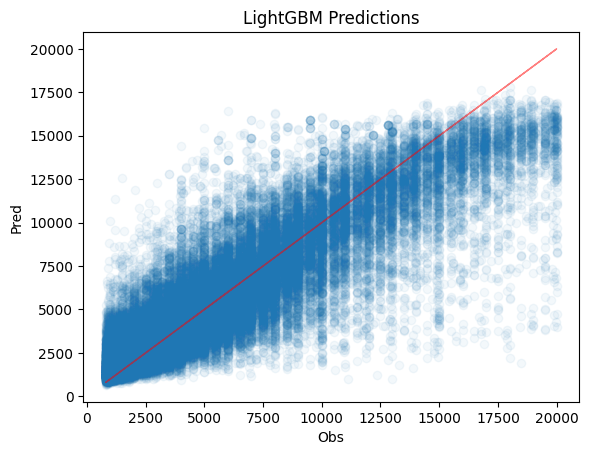

In [60]:
# Visualización de predicciones
plt.scatter(x = y_test, y = lgb_pred, alpha=.05)
plt.title("LightGBM Predictions")
plt.xlabel("Obs")
plt.ylabel("Pred")
plt.plot(y_test , y_test , color = "red", alpha=.5, linewidth=1)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo incorporando LightGBM Oscar! Has configurado muy bien los parámetros básicos del modelo, incluyendo el early_stopping_rounds, lo cual es muy buena práctica para evitar el sobreajuste. La organización en bloques de creación del dataset, ajuste, predicción y evaluación es muy clara, y el análisis de resultados mediante el DataFrame de comparación facilita interpretar el desempeño.
    
<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Solo una pequeña corrección: en el print, mencionas "R2 del mejor modelo en Bosque Aleatorio", pero aquí estás evaluando el modelo de LightGBM

</div>
</div>

### Modelo con descenso de gradiente CatBoost

In [61]:
# Inicio del tiempo de ejecución
cb_start_time = time.time()

# Creación del modelo CatBoost
cb_mod = CatBoostRegressor(iterations=100, # Ajuste del número de iteraciones
                          learning_rate=0.1, # Ajuste de la tasa de aprendizaje
                          depth=6, # Ajuste de la profundidad del árbol
                          loss_function='RMSE', # Función de pérdida
                          random_seed=42, # Semilla aleatoria para la reproducibilidad
                          verbose=100) # Imprimir información cada 100 iteraciones

# Entrenamiento del modelo
cb_mod.fit(X_train, y_train, eval_set=(X_test, y_test))

# Predicciones en el conjunto de prueba
cb_pred = cb_mod.predict(X_test)

# Evaluación del modelo
cb_rmse = mean_squared_error(y_test, cb_pred, squared=False)
cb_r2 = r2_score(y_test, cb_pred)
print(f'RMSE: {cb_rmse}')
print(f"R2 del mejor modelo en Bosque Aleatorio: {cb_r2:.2%}")

# Medición del tiempo de ejecución
cb_end_time = time.time()
cb_execution_time = cb_end_time - cb_start_time
print(f"Tiempo de ejecución: {cb_execution_time} segundos")

0:	learn: 3989.7153033	test: 3976.2043714	best: 3976.2043714 (0)	total: 72.9ms	remaining: 7.22s
99:	learn: 2005.5097031	test: 2003.8622527	best: 2003.8622527 (99)	total: 2.04s	remaining: 0us

bestTest = 2003.862253
bestIteration = 99

RMSE: 2003.8622527453406
R2 del mejor modelo en Bosque Aleatorio: 77.13%
Tiempo de ejecución: 3.471074104309082 segundos


In [62]:
# DF valores predichos-verdaderos

cb_pred_s = pd.Series(cb_pred, index=X_test.index)
cb_compar_df = pd.concat([cb_pred_s,y_test],axis=1, join='inner')
cb_compar_df.columns = ['predicted', 'true']
cb_compar_df["diff"] = cb_compar_df["true"] - cb_compar_df["predicted"]
cb_compar_df.sort_values(by='diff', ascending=True)

,predicted,true,diff
67328,15390.4856,2990,-12400.4856
297086,17652.4879,6000,-11652.4879
77002,12653.2988,1200,-11453.2988
43645,16805.4086,5699,-11106.4086
109581,15089.9208,4500,-10589.9208
...,...,...,...
196693,3819.0000,19750,15931.0000
145034,2817.0850,18999,16181.9150
344459,2102.1306,18500,16397.8694
96695,3034.7404,19500,16465.2596


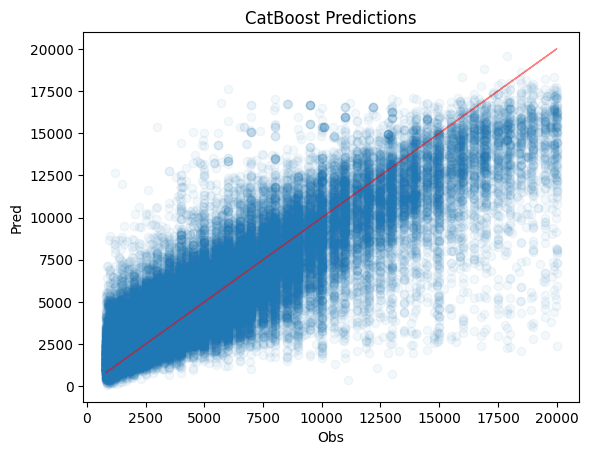

In [63]:
# Visualización de predicciones
plt.scatter(x = y_test, y = cb_pred, alpha=.05)
plt.title("CatBoost Predictions")
plt.xlabel("Obs")
plt.ylabel("Pred")
plt.plot(y_test , y_test , color = "red", alpha=.5, linewidth=1)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Oscar has configurado de forma muy sólida los hiperparámetros principales y lograste entrenar el modelo rápidamente, con un RMSE y R² muy competitivos. La forma en que estructuraste el flujo (creación, ajuste, predicción, evaluación y visualización) es clara y ordenada.

</div>

### Modelo con descenso de gradiente XGBoost

In [64]:
# Inicio del tiempo de ejecución
xgb_start_time = time.time()

# Conjunto de datos para XGBoost
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)

# Parámetros del modelo
params = {
    'objective': 'reg:squarederror',  # Para regresión
    'eval_metric': 'rmse',
    'eta': 0.1,  # Tasa de aprendizaje
    'max_depth': 6,  # Profundidad máxima del árbol
}

# Entrenamiento del modelo
num_rounds = 100  # Número de rondas de boosting
xgb_mod = xgb.train(params, xgb_train, num_rounds, evals=[(xgb_test, 'eval')], early_stopping_rounds=10)


# Predicciones en el conjunto de prueba
xgb_pred = xgb_mod.predict(xgb_test)

# Evaluación del modelo
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_pred)
print(f'RMSE: {xgb_rmse}')
print(f"R2 del mejor modelo en Bosque Aleatorio: {xgb_r2:.2%}")

# Medición del tiempo de ejecución
xgb_end_time = time.time()
xgb_execution_time = xgb_end_time - xgb_start_time
print(f"Tiempo de ejecución: {xgb_execution_time} segundos")

[0]	eval-rmse:5887.31885
[1]	eval-rmse:5428.09961
[2]	eval-rmse:5022.95947
[3]	eval-rmse:4665.05713
[4]	eval-rmse:4354.26660
[5]	eval-rmse:4074.11353
[6]	eval-rmse:3833.60352
[7]	eval-rmse:3622.76196
[8]	eval-rmse:3436.55957
[9]	eval-rmse:3275.20190
[10]	eval-rmse:3135.07666
[11]	eval-rmse:3014.23755
[12]	eval-rmse:2910.15820
[13]	eval-rmse:2815.50757
[14]	eval-rmse:2739.04956
[15]	eval-rmse:2668.65649
[16]	eval-rmse:2604.99561
[17]	eval-rmse:2551.71655
[18]	eval-rmse:2507.74341
[19]	eval-rmse:2467.40845
[20]	eval-rmse:2430.13965
[21]	eval-rmse:2393.86279
[22]	eval-rmse:2364.12256
[23]	eval-rmse:2335.14282
[24]	eval-rmse:2310.94287
[25]	eval-rmse:2281.47852
[26]	eval-rmse:2262.27417
[27]	eval-rmse:2244.80981
[28]	eval-rmse:2229.68262
[29]	eval-rmse:2207.12622
[30]	eval-rmse:2193.76099
[31]	eval-rmse:2180.10010
[32]	eval-rmse:2168.24292
[33]	eval-rmse:2155.74219
[34]	eval-rmse:2143.74634
[35]	eval-rmse:2133.97778
[36]	eval-rmse:2119.59839
[37]	eval-rmse:2110.53687
[38]	eval-rmse:2100.87

In [65]:
# DF valores predichos-verdaderos

xgb_pred_s = pd.Series(xgb_pred, index=X_test.index)
xgb_compar_df = pd.concat([xgb_pred_s,y_test],axis=1, join='inner')
xgb_compar_df.columns = ['predicted', 'true']
xgb_compar_df["diff"] = xgb_compar_df["true"] - xgb_compar_df["predicted"]
xgb_compar_df.sort_values(by='diff', ascending=True)

,predicted,true,diff
297086,17320.7930,6000,-11320.7930
216642,16175.7568,5000,-11175.7568
137330,12384.1064,1500,-10884.1064
174159,14561.1221,4000,-10561.1221
338135,16455.9922,5999,-10456.9922
...,...,...,...
175170,4324.0723,19900,15575.9277
156553,4299.2129,19900,15600.7871
15414,2324.1934,18000,15675.8066
344459,2218.7454,18500,16281.2546


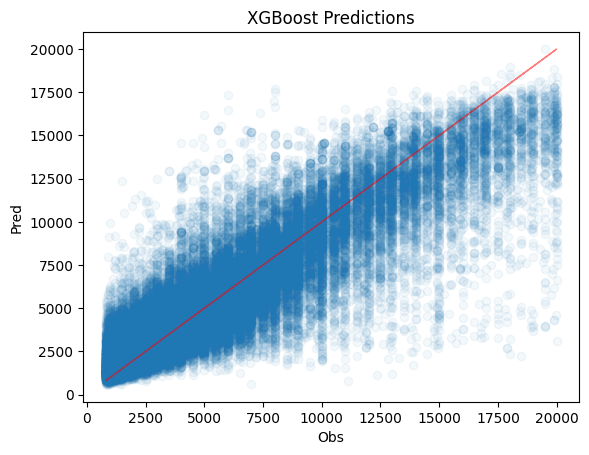

In [66]:
# Visualización de predicciones
plt.scatter(x = y_test, y = xgb_pred, alpha=.05)
plt.title("XGBoost Predictions")
plt.xlabel("Obs")
plt.ylabel("Pred")
plt.plot(y_test , y_test , color = "red", alpha=.5, linewidth=1)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Fantástico cierre de modelos con XGBoost! Aplicaste correctamente la creación de DMatrix, configuraste muy bien los parámetros iniciales y utilizaste early_stopping_rounds, mostrando un manejo muy maduro del flujo de entrenamiento. El RMSE logrado es el más bajo de todos los modelos que probaste y el R² de casi 80% es un excelente resultado.

</div>

## Análisis del modelo

Modelo de Regresión Lineal

In [67]:
print(f'RMSE en Regresión Lineal: {lr_rmse}')
print(f'R2 en Regresión Lineal: {lr_r2:.2%}')
print(f"Tiempo de ejecución: {lr_execution_time} segundos")

RMSE en Regresión Lineal: 2136.3043231549773
R2 en Regresión Lineal: 74.01%
Tiempo de ejecución: 9.21694564819336 segundos


Modelo de Árbol de decisión

In [68]:
print(f"RECM del mejor modelo en Árbol de Decisión (max_depth = {best_dtr_depth}): {best_dtr_rmse}")
print(f"R2 del mejor modelo en Árbol de Decisión: {best_dtr_r2:.2%}")
print(f"Tiempo de ejecución: {dtr_execution_time} segundos")

RECM del mejor modelo en Árbol de Decisión (max_depth = 28): 1953.1835936627194
R2 del mejor modelo en Árbol de Decisión: 78.28%
Tiempo de ejecución: 193.60265111923218 segundos


Modelo de Bosque aleatorio

In [69]:
print(f"RECM del mejor modelo en Bosque Aleatorio: {best_rfr_rmse} n_estimators: {best_rfr_est} best_depth: {best_rfr_depth}")
print(f"R2 del mejor modelo en Bosque Aleatorio: {best_rfr_r2:.2%}")
print(f"Tiempo de ejecución: {rfr_execution_time} segundos")

RECM del mejor modelo en Bosque Aleatorio: 2908.8660610631105 n_estimators: 20 best_depth: 5
R2 del mejor modelo en Bosque Aleatorio: 51.82%
Tiempo de ejecución: 424.0696032047272 segundos


Modelo con descenso de gradiente LightGBM

In [70]:
print(f'RMSE: {lgb_rmse}')
print(f"R2 del mejor modelo en Bosque Aleatorio: {lgb_r2:.2%}")
print(f"Tiempo de ejecución: {lgb_execution_time} segundos")

RMSE: 1908.6063688775869
R2 del mejor modelo en Bosque Aleatorio: 79.26%
Tiempo de ejecución: 5.7076640129089355 segundos


Modelo con descenso de gradiente CatBoost

In [71]:
print(f'RMSE: {cb_rmse}')
print(f"R2 del mejor modelo en Bosque Aleatorio: {cb_r2:.2%}")
print(f"Tiempo de ejecución: {cb_execution_time} segundos")

RMSE: 2003.8622527453406
R2 del mejor modelo en Bosque Aleatorio: 77.13%
Tiempo de ejecución: 3.471074104309082 segundos


Modelo con descenso de gradiente XGBoost

In [72]:
print(f'RMSE: {xgb_rmse}')
print(f"R2 del mejor modelo en Bosque Aleatorio: {xgb_r2:.2%}")
print(f"Tiempo de ejecución: {xgb_execution_time} segundos")

RMSE: 1877.1235835758746
R2 del mejor modelo en Bosque Aleatorio: 79.94%
Tiempo de ejecución: 295.18981075286865 segundos


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Perfecto! Has reunido muy bien los resultados de cada modelo para hacer el análisis comparativo final. Tus métricas son muy completas: reportas RMSE, R² y tiempos de ejecución, lo cual permite evaluar no solo la precisión, sino también la eficiencia de cada modelo. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Algo importante a corregir: en casi todos los print sigues diciendo "R2 del mejor modelo en Bosque Aleatorio" aunque estés hablando de otros modelos como LightGBM, CatBoost o XGBoost; sería bueno corregir eso para que tu reporte final sea más claro y preciso.

</div>
</div>

Comentario final

El análisis parte con la aplicación del modelo de regresión lineal, para determinar un valor aproximado para el RECM que asciende a 2,136.

Considerando los modelos de regresión lineal, árbol de decisión y bosque aleatorio, así como los modelos con descenso de gradiente con las librerías de LightGBM, CatBoost y XGBoost, podemos apreciar que la métrica de evaluación abunda el umbral de los 2,000 puntos. Cabe señalar que los modelos sin descenso de gradiente se procesaron con un escalamiento con log10 aplicado a la columna objetivo, efecto que se invierte posteriormente a la predicción y justo antes de la evaluación de RECM, mientras que para los modelos con descenso de gradiente fueron procesados con los objetivos originales.

Los modelos configurados con hiperparámetros, tienden a mejorar la métrica mientras mayor sea el nivel de profundidad, iteraciones o rondas. Sin embargo, el bosque aleatorio emplea mucho más tiempo en lograr alcanzar el umbral de los 2,000 puntos de RECM.


Nota: Para efectos de poder correr el código de manera rápida, la configuración del Modelo de Bosque aleatorio se presenta de la siguiente manera:
for est in range(10, 51, 10): # Rango del hiperparámetro de estimadores
for depth in range(1, 6): # Rango del hiperparámetro de profundidad

Sin embargo, se hizo la prueba con n_estimators 50 , best_depth 10:
* RECM del mejor modelo en Bosque Aleatorio: 2410.9327510735698
* R2 del mejor modelo en Bosque Aleatorio: 66.90%
* Tiempo de ejecución: 1516.7776019573212 segundos (25 minutos)

Y la prueba con n_estimators 50, Depth 15:
* RECM del mejor modelo en Bosque Aleatorio: 2042.8989034426602
* R2 del mejor modelo en Bosque Aleatorio: 76.23%
* Tiempo de ejecución: 3047.9355659484863 segundos (50 minutos)

En conclusión, se puede apreciar que el desempeño de los boosters puede ayudar con el procesamiento de los datos, la aproximación a los datos deseados y tiempos aceptables.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Oscar tu conclusión final resume de manera ordenada el proceso de evaluación de los modelos, destacando claramente la relación entre la configuración de hiperparámetros, el desempeño (RECM y R²) y el tiempo de procesamiento. Es muy valioso que expliques las diferencias de tratamiento entre modelos tradicionales y de descenso de gradiente, así como el impacto que tienen las decisiones de escalamiento en los resultados. También es acertado que adviertas sobre los altos tiempos de ejecución del Bosque Aleatorio en contraste con los boosters, ofreciendo una visión realista del balance entre precisión y eficiencia.

</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en orden de ejecución
- [ ]  Los datos han sido descargados y preparados
- [ ]  Los modelos han sido entrenados
- [ ]  Se realizó el análisis de velocidad y calidad de los modelos